In [1]:
'''
Name: True Mayer
Author: josephlee94
Desc: This programs will used deep learning neural networks to predict the
        price of a house using keras and tensorflow
'''
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
# Getting the values in the dataframe
dataset = df.values

In [4]:
# Splitting data into input and output values
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing

In [6]:
# We normalize the data so it's easier to process
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Here we split in the inputs (X) and outputs (Y) into sections to train,
# evaluate the model on each epoch, and test the model after training
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# This model's network consists of 4 layers, an input layer of 10 nodes,
# 2 hidden layer each with 32 nodes using the relu activation function,
# and an output layer with 1 node using the sigmoid function
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [12]:
# The optimizer will be stochastic gradient descent, the loss function will
# be binary crossentropy since we're looking for a binary output, and we also
# want to track the accuracy.
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# This trains the model given the input/outputs (x_train/y_train), a minibatch
# size of 32, 100 epochs, and the data the show accuracy at each epoch through
# x_val, and y_val
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5890 - val_loss: 0.6806 - val_accuracy: 0.6119
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6526 - val_loss: 0.6753 - val_accuracy: 0.6804
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.7123 - val_loss: 0.6701 - val_accuracy: 0.7260
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.7231 - val_loss: 0.6659 - val_accuracy: 0.7397
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7339 - val_loss: 0.6621 - val_accuracy: 0.7489
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7495 - val_loss: 0.6584 - val_accuracy: 0.7671
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7515 - val_loss: 0.6546 - val_accuracy: 0.7900
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8689 - val_loss: 0.2895 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8728 - val_loss: 0.2866 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8708 - val_loss: 0.2849 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8708 - val_loss: 0.2815 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8757 - val_loss: 0.2799 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8767 - val_loss: 0.2768 - val_accuracy: 0.8858
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8767 - val_loss: 0.2758 - val_accuracy: 0.8858
Epoch 

In [14]:
# Here we test the models accuracy on data it didn't have access to to 
# simulate real world data
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.8904


0.8904109597206116

In [15]:
import matplotlib.pyplot as plt

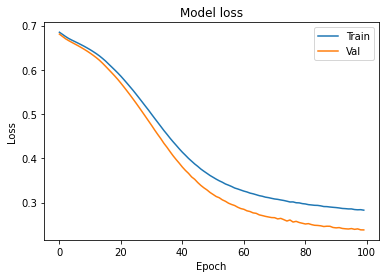

In [16]:
# Plotting the models loss aka far off from correct it was each epoch
# and on the final data
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

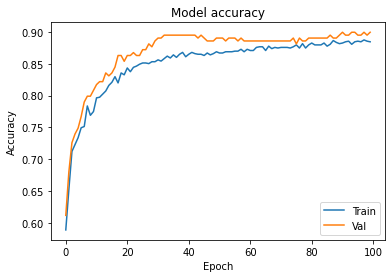

In [23]:
# Plotting how accurate the model was during training and on the test data
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
# This model is designed to overfit by giving it a lot nodes and hidden layers
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 0.5106 - accuracy: 0.7524 - val_loss: 0.3477 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3642 - accuracy: 0.8483 - val_loss: 0.3458 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3375 - accuracy: 0.8659 - val_loss: 0.2459 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2885 - accuracy: 0.8816 - val_loss: 0.2341 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2724 - accuracy: 0.8943 - val_loss: 0.2535 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2900 - accuracy: 0.8865 - val_loss: 0.2401 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2820 - accuracy: 0.8855 - val_loss: 0.2440 - val_accuracy: 0.9041
Epoch 

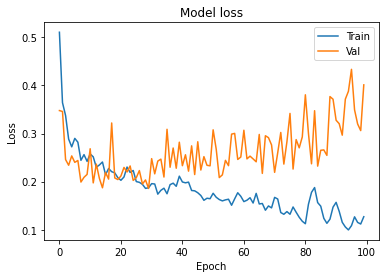

In [25]:
# Then we plot loss again
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

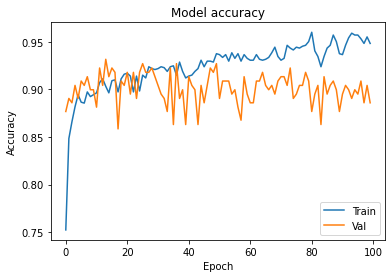

In [27]:
# and accuracy
# The "val" accuracy is much worse because due to overfitting as the model is
# less able to adapt to new data
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
# With this model we'll add regularization and dropout to the layers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 27ms/step - loss: 14.2335 - accuracy: 0.6282 - val_loss: 3.8709 - val_accuracy: 0.8904
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 1.6577 - accuracy: 0.8474 - val_loss: 0.6322 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 25ms/step - loss: 0.5811 - accuracy: 0.8444 - val_loss: 0.4673 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4996 - accuracy: 0.8757 - val_loss: 0.4341 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5084 - accuracy: 0.8699 - val_loss: 0.4874 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5201 - accuracy: 0.8493 - val_loss: 0.4425 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4874 - accuracy: 0.8630 - val_loss: 0.4271 - val_accuracy: 0.8950
Epoch

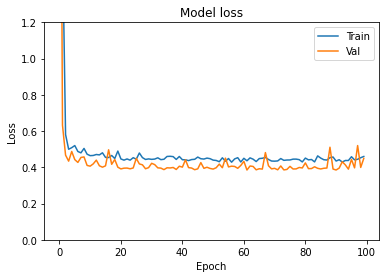

In [31]:
# Plotting loss and zooming in between 0 and 1.2. Loss is higher because
# the loss function was changed
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

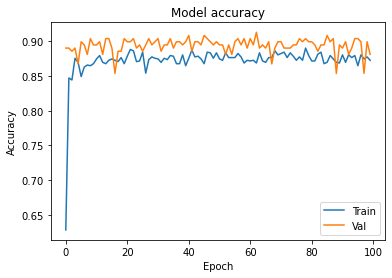

In [32]:
# and we plot accuracy and they correlate much better now.
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()